In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Example for one feature visualization.

In [8]:
iot_table = pd.read_csv('dataset.csv', index_col=[0], na_values=['NA'])

In [9]:
iot_table

LABEL (pcap_folder) protocol name  num. of appearances  mean packet size  \
0                 Aria           TCP                  603        175.278402   
1            D-LinkCam           UDP                 4721        237.742937   
2         D-LinkDayCam           UDP                  862        218.005800   
3     D-LinkDoorSensor           TCP                 3561        264.363661   
4        D-LinkHomeHub           TCP                12032        474.635327   
5         D-LinkSensor           TCP                 9829        528.624075   
6          D-LinkSiren           TCP                 9018        518.222745   
7         D-LinkSwitch           TCP                10611        527.609646   
8    D-LinkWaterSensor           TCP                 9102        505.930480   
9           EdimaxCam1           UDP                  431        244.329466   
10          EdimaxCam2           UDP                  288        249.388889   
11     EdimaxPlug1101W           UDP                  754        175.233223   
12     EdimaxPlug2101W           UDP                  678        172.020674   
13           EdnetCam1           UDP                  157        185.318471   
14           EdnetCam2           UDP                  124        184.258064   
15        EdnetGateway           TCP                  608         97.094340   
16       HomeMaticPlug           TCP                 1024         77.417969   
17           HueBridge           TCP                21938        169.829323   
18           HueSwitch           TCP                38491        172.919737   
19            Lightify           UDP                 6882        169.411944   
20          MAXGateway           TCP                  901         80.100488   
21       SmarterCoffee           UDP                   82        339.047619   
22    TP-LinkPlugHS100           TCP                  936        273.928994   
23    TP-LinkPlugHS110           TCP                  829        286.940741   
24   WeMoInsightSwitch           TCP                 4443        369.946255   
25  WeMoInsightSwitch2           TCP                 2560        620.028723   
26            WeMoLink           TCP                 8913        383.794035   
27          WeMoSwitch           TCP                 4994        529.716464   
28         WeMoSwitch2           TCP                  762        355.426114   
29            Withings           TCP                 1027        228.964072   
30            iKettle2           UDP                   80        346.000000   

    mean time-diff between packets    mean tsval  \
0                      7924.410198  4.158004e-01   
1                      1652.096146  8.896871e+08   
2                      5680.645268  0.000000e+00   
3                       299.499950  3.905323e+08   
4                       441.301842  1.057702e+09   
5                       933.935975  8.122683e+08   
6                       102.598385  8.575908e+08   
7                       920.697940  8.465297e+08   
8                       105.614553  8.482271e+08   
9                     12993.419950  0.000000e+00   
10                     8398.236566  0.000000e+00   
11                     4084.119624  1.720196e+09   
12                     4331.621591  1.515106e+09   
13                     7177.612073  0.000000e+00   
14                     8154.451728  0.000000e+00   
15                     1041.623413  0.000000e+00   
16                     1117.484709  0.000000e+00   
17                      444.936626  1.989698e+09   
18                       46.036042  2.002189e+08   
19                      150.889911  0.000000e+00   
20                     1091.257780  6.623307e+05   
21                    19765.447930  0.000000e+00   
22                     1405.614369  1.879254e+09   
23                     1274.257438  1.852533e+09   
24                     1812.337196  1.682938e+09   
25                        0.324967  1.002530e+05   
26                     1100.563239  4.508244e+06   
27                

In [10]:
iot_table.describe()

num. of appearances  mean packet size  mean time-diff between packets  \
count            31.000000         31.000000                       31.000000   
mean           5072.290323        295.533183                     3348.041961   
std            7967.213303        151.050610                     4557.949790   
min              80.000000         77.417969                        0.324967   
25%             643.000000        175.255812                      443.119234   
50%            1024.000000        249.388889                     1117.484709   
75%            7897.500000        376.870145                     5006.133429   
max           38491.000000        620.028723                    19765.447930   

         mean tsval  
count  3.100000e+01  
mean   5.827443e+08  
std    7.233243e+08  
min    0.000000e+00  
25%    0.000000e+00  
50%    7.459103e+06  
75%    9.736943e+08  
max    1.989698e+09

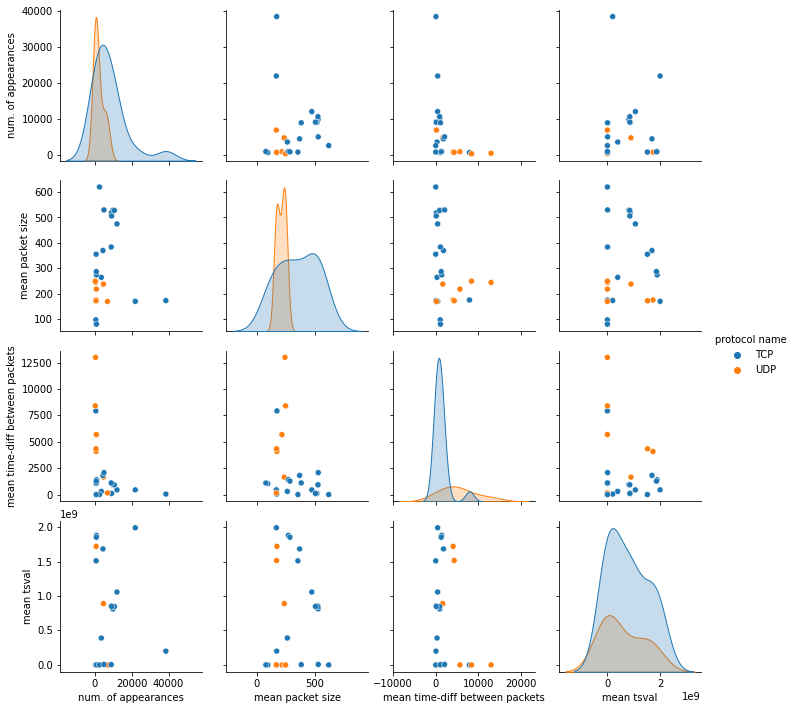

In [12]:
sb.pairplot(iot_table.dropna(), hue='protocol name')

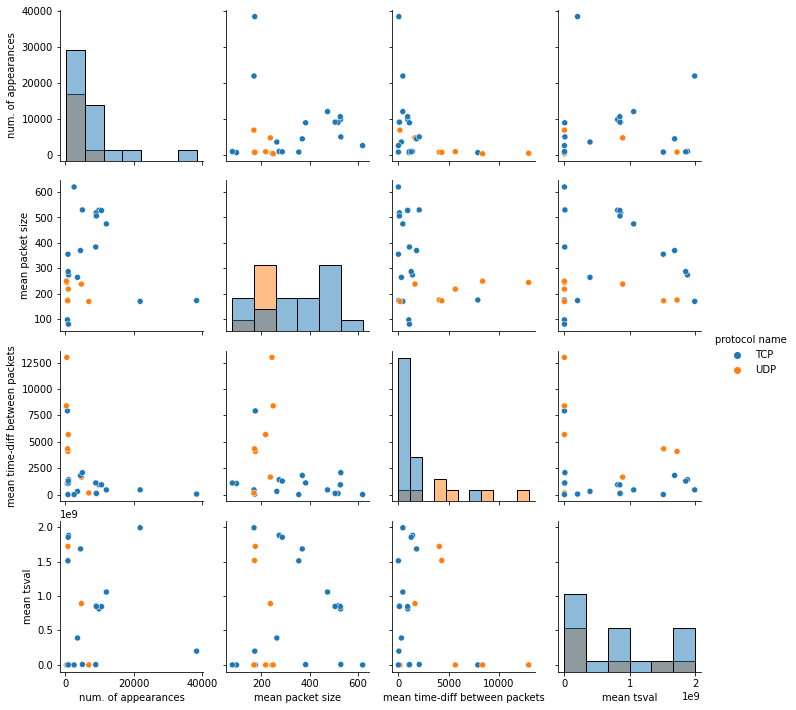

In [21]:
sb.pairplot(iot_table.dropna(), hue='protocol name', diag_kind='hist')

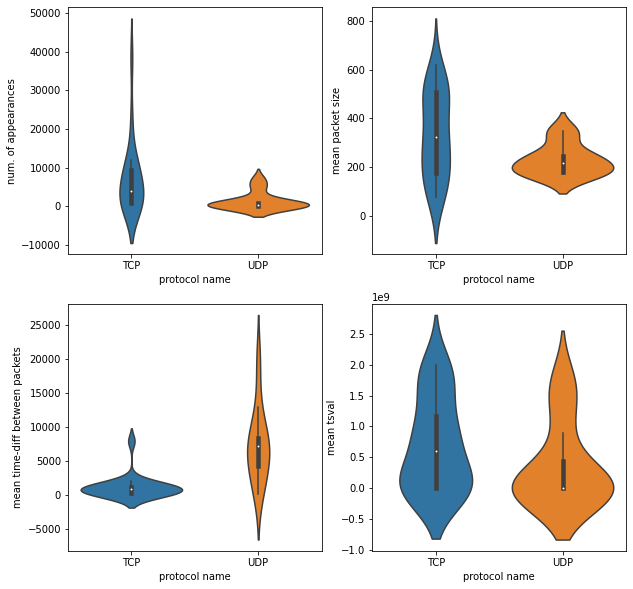

In [17]:
plt.figure(figsize=(10, 10))
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

for column_index, column in enumerate(iot_table.select_dtypes(include=numerics).columns):
    if column == 'protocol name':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='protocol name', y=column, data=iot_table)

# Multiple features.

***LABEL (pcap_folder)


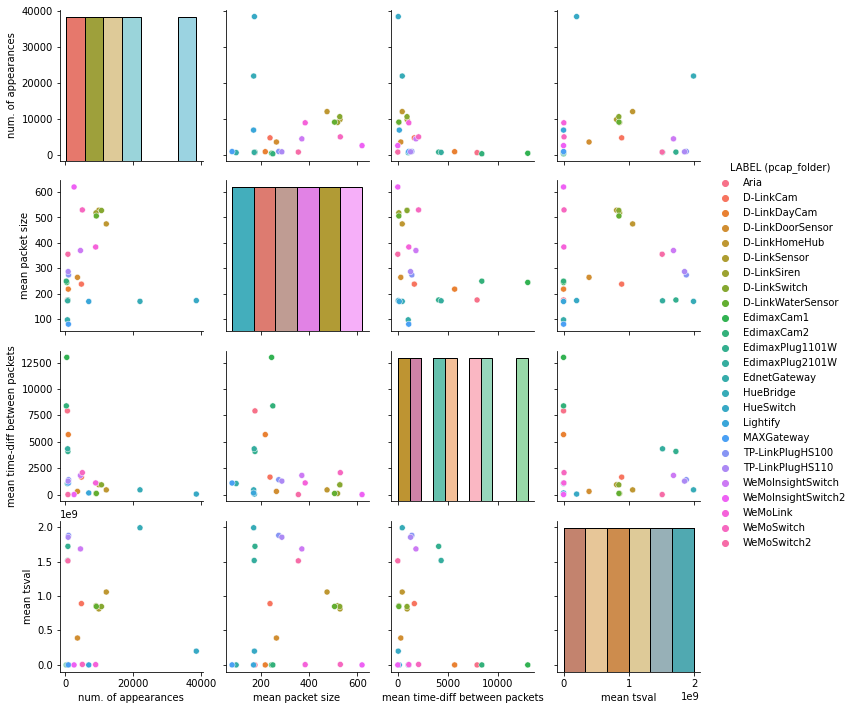

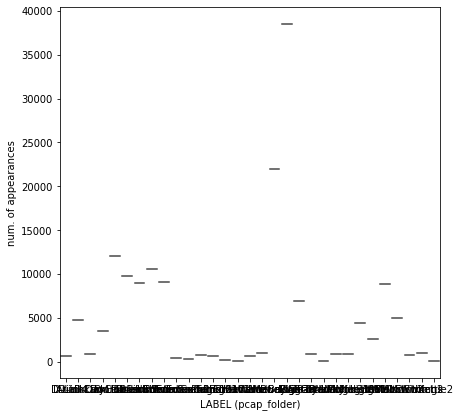

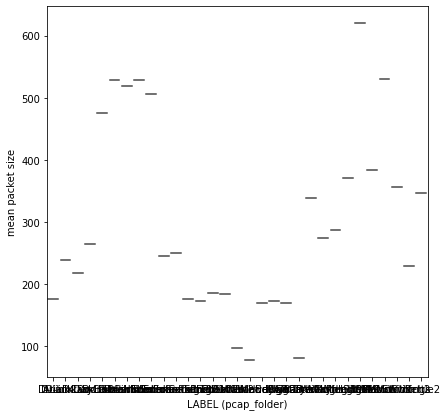

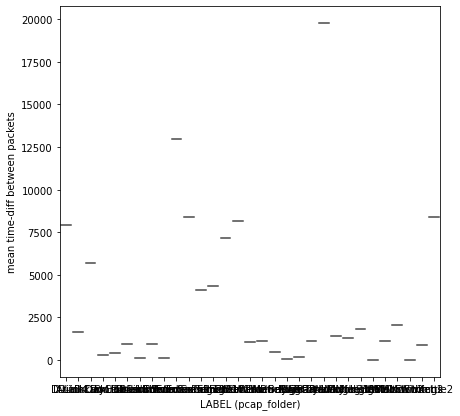

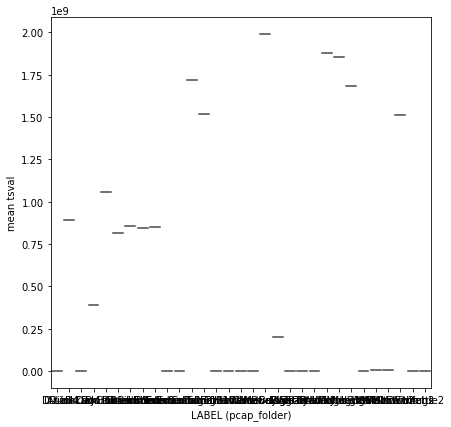

***protocol name


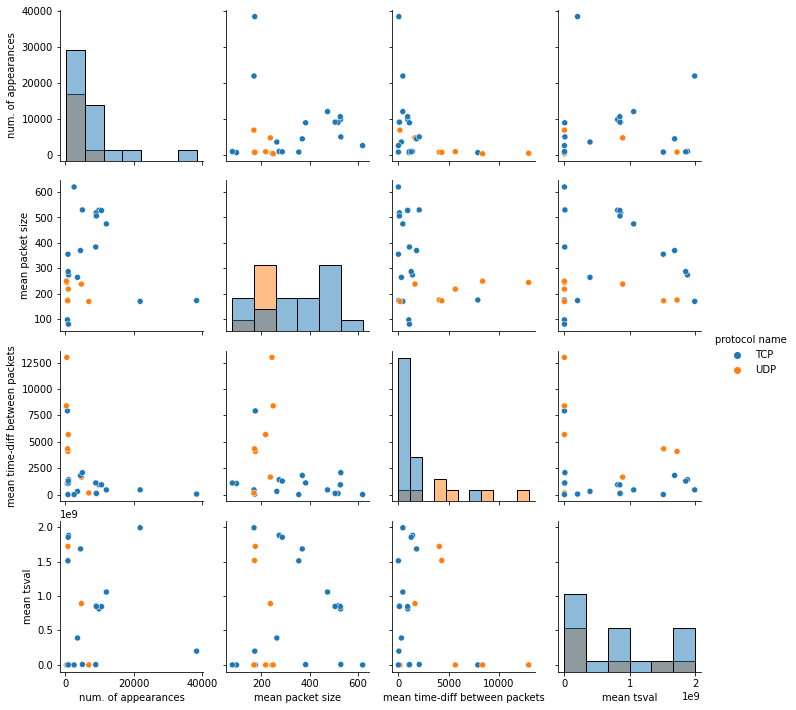

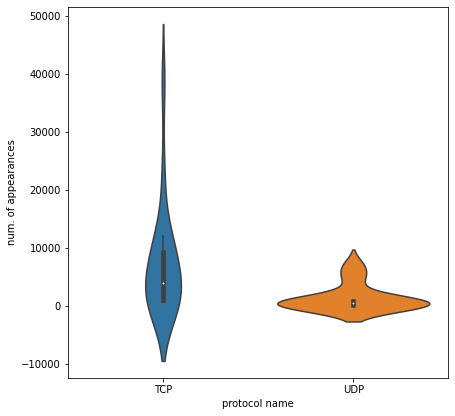

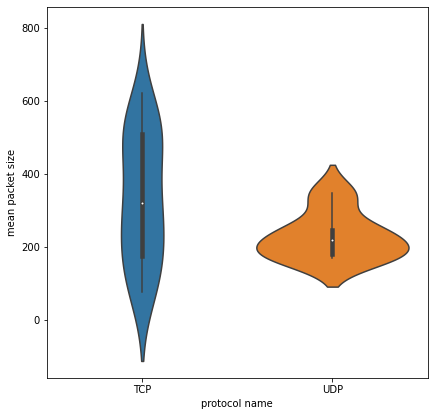

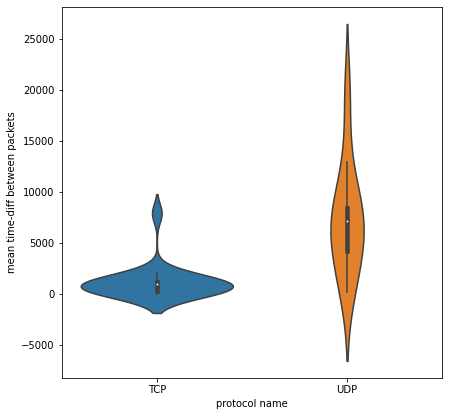

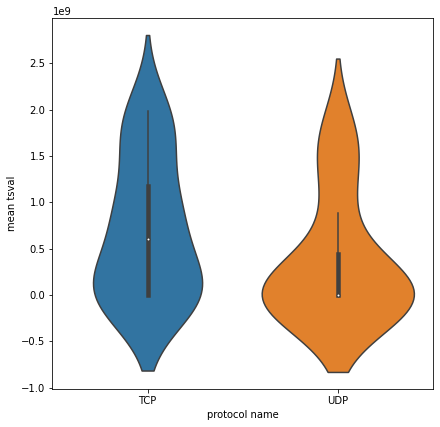

***answers


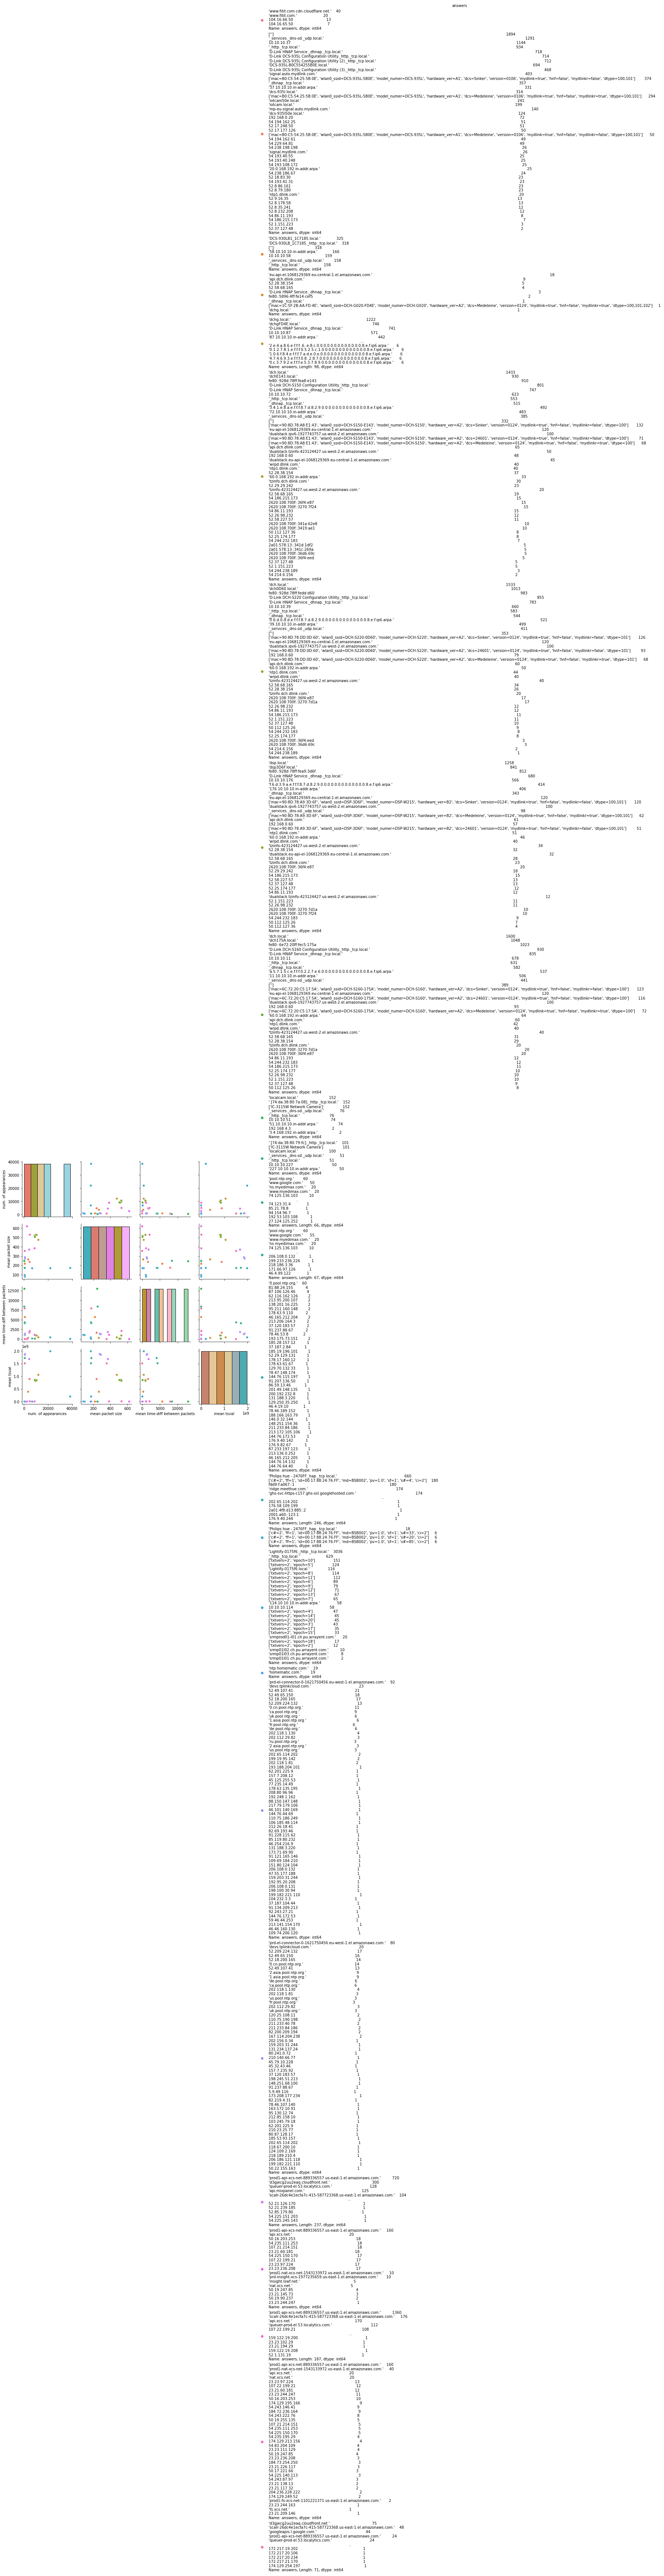

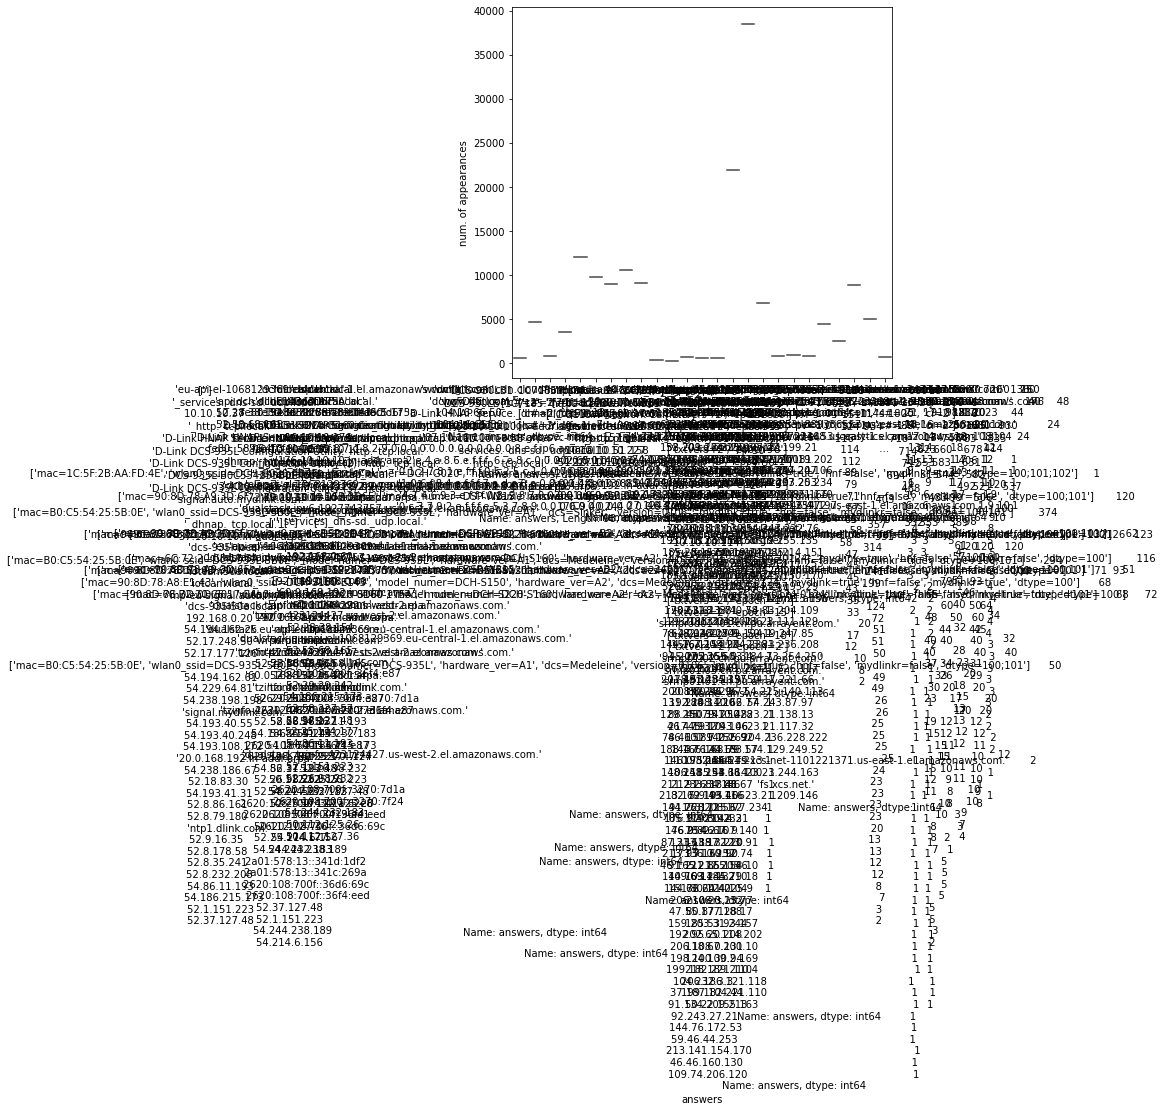

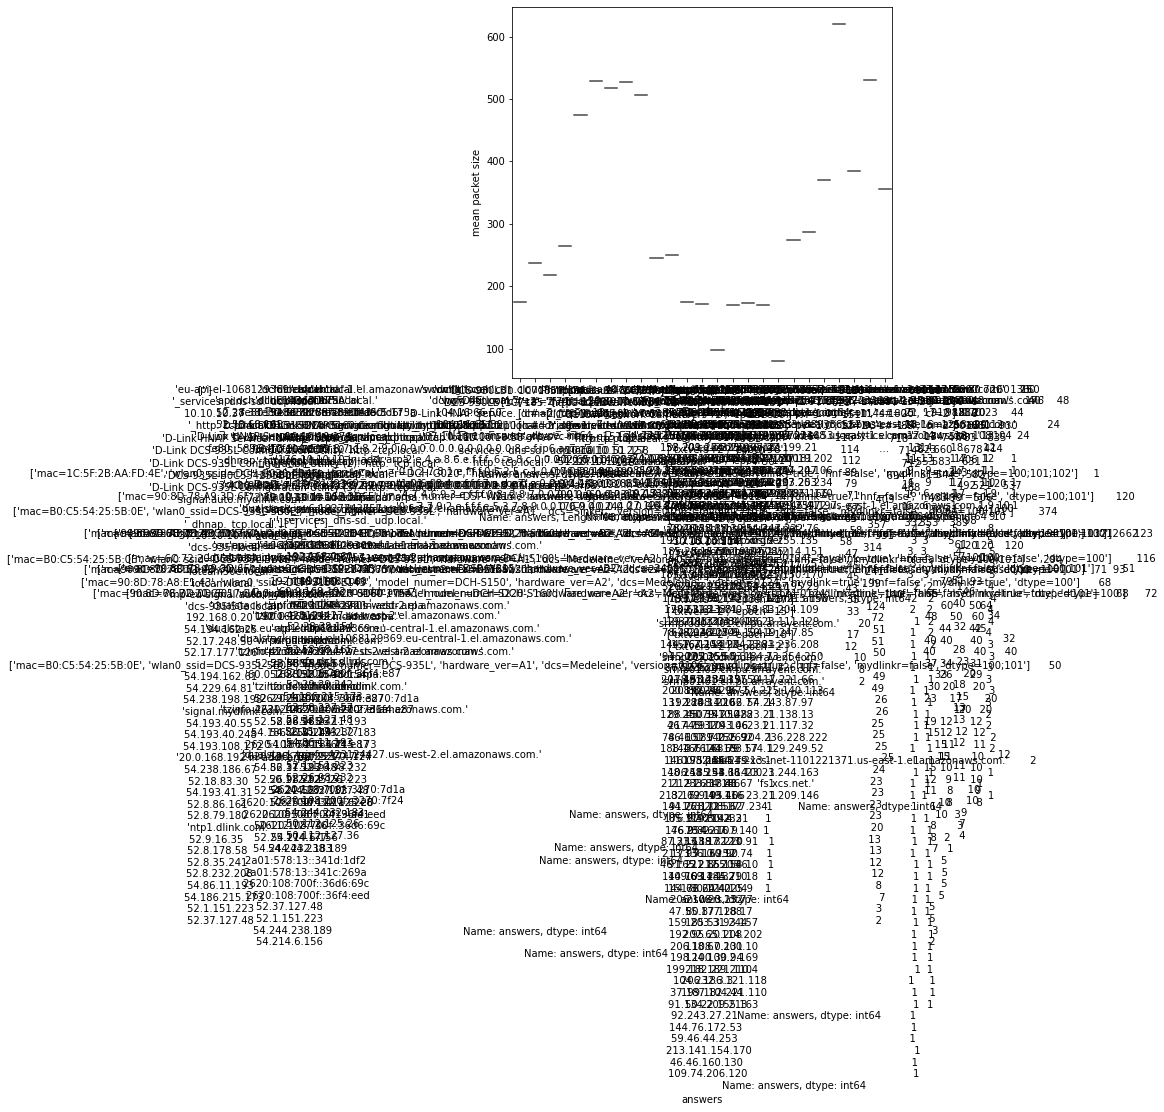

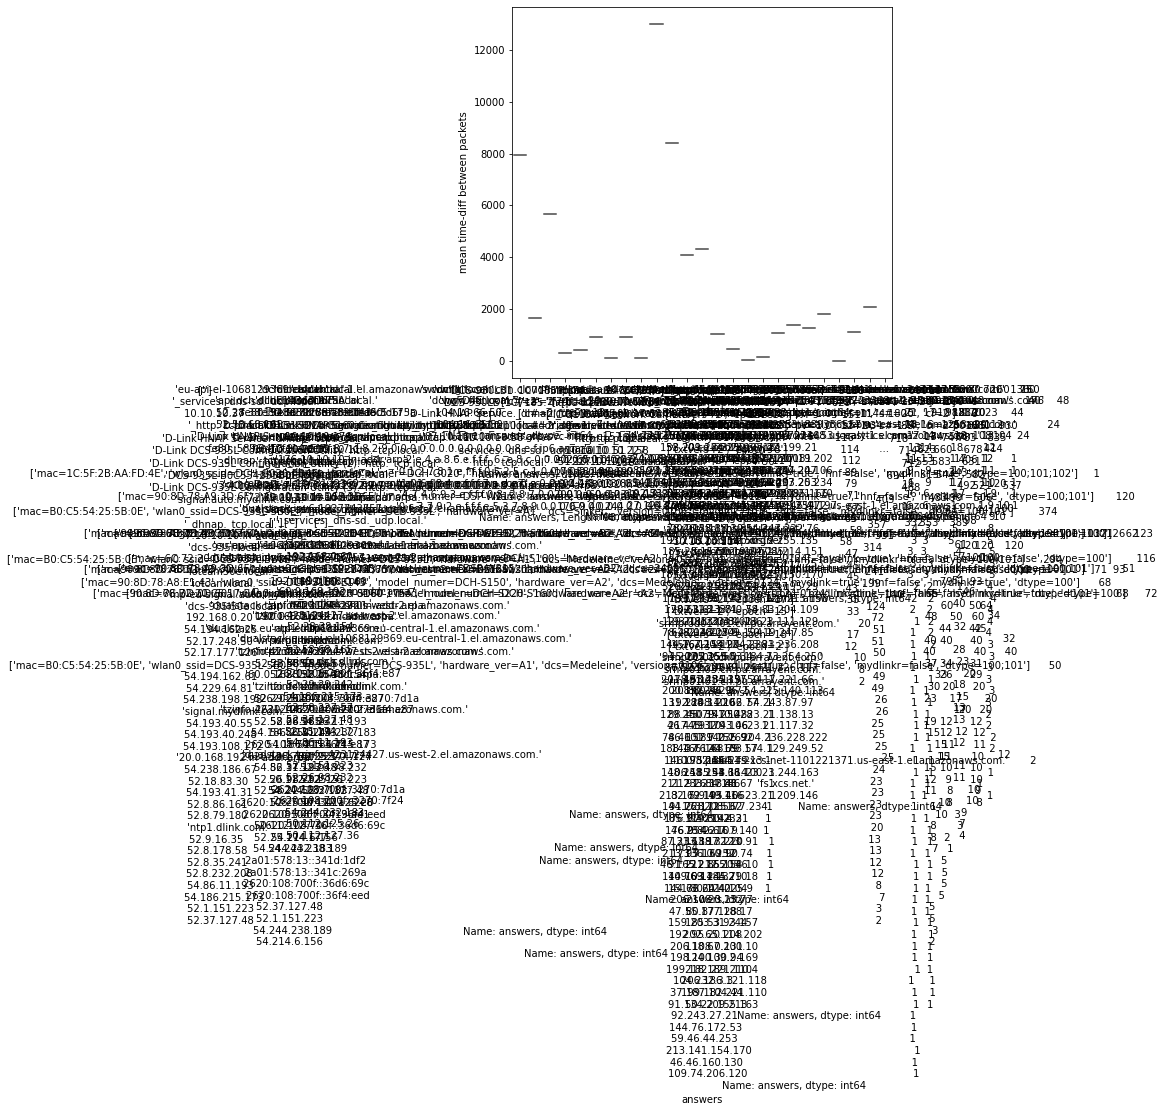

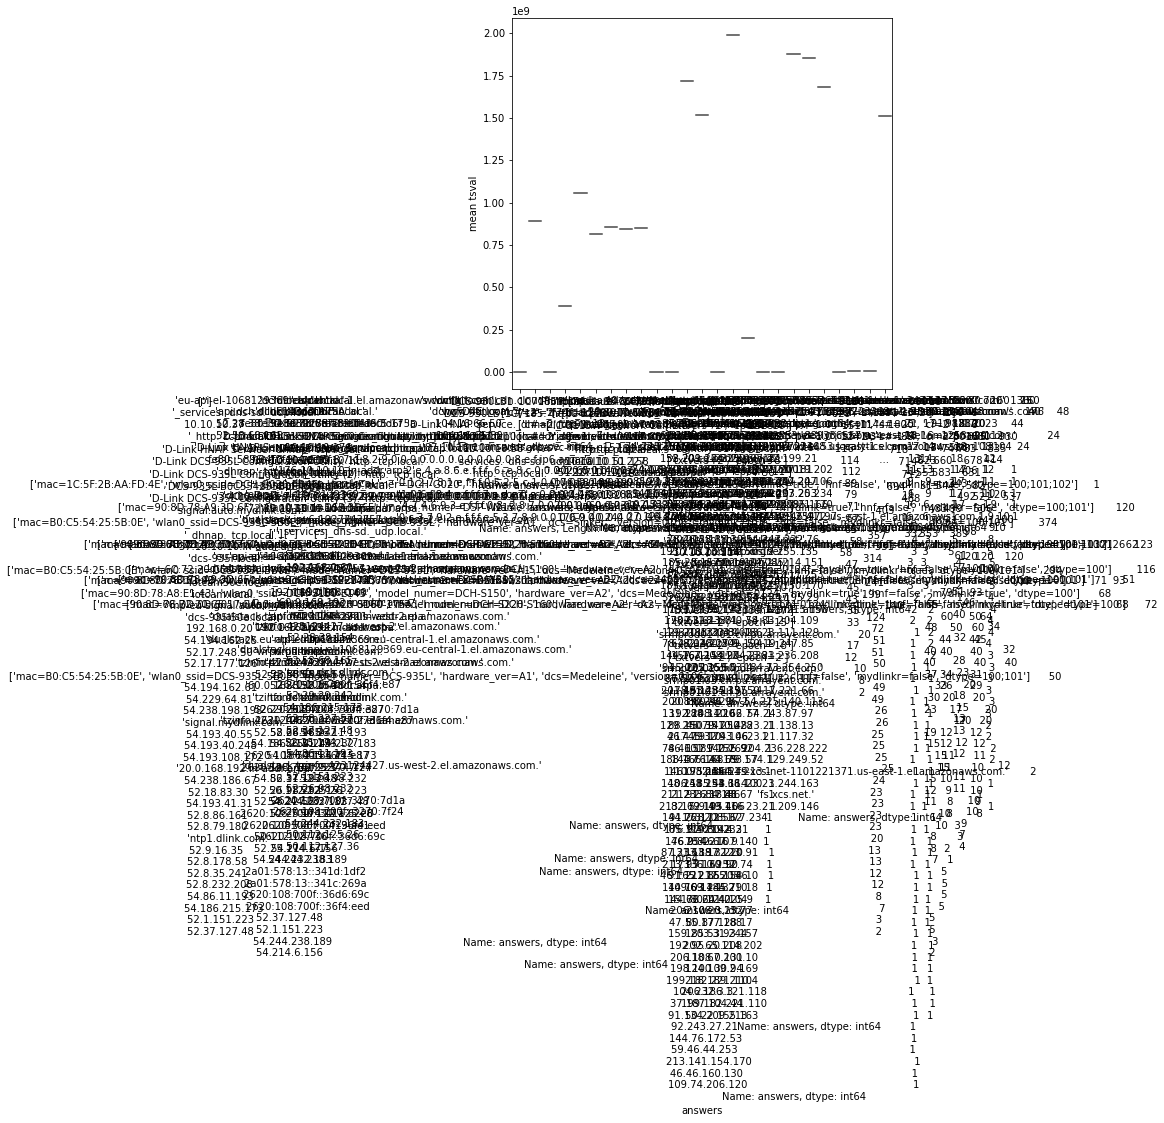

***sni


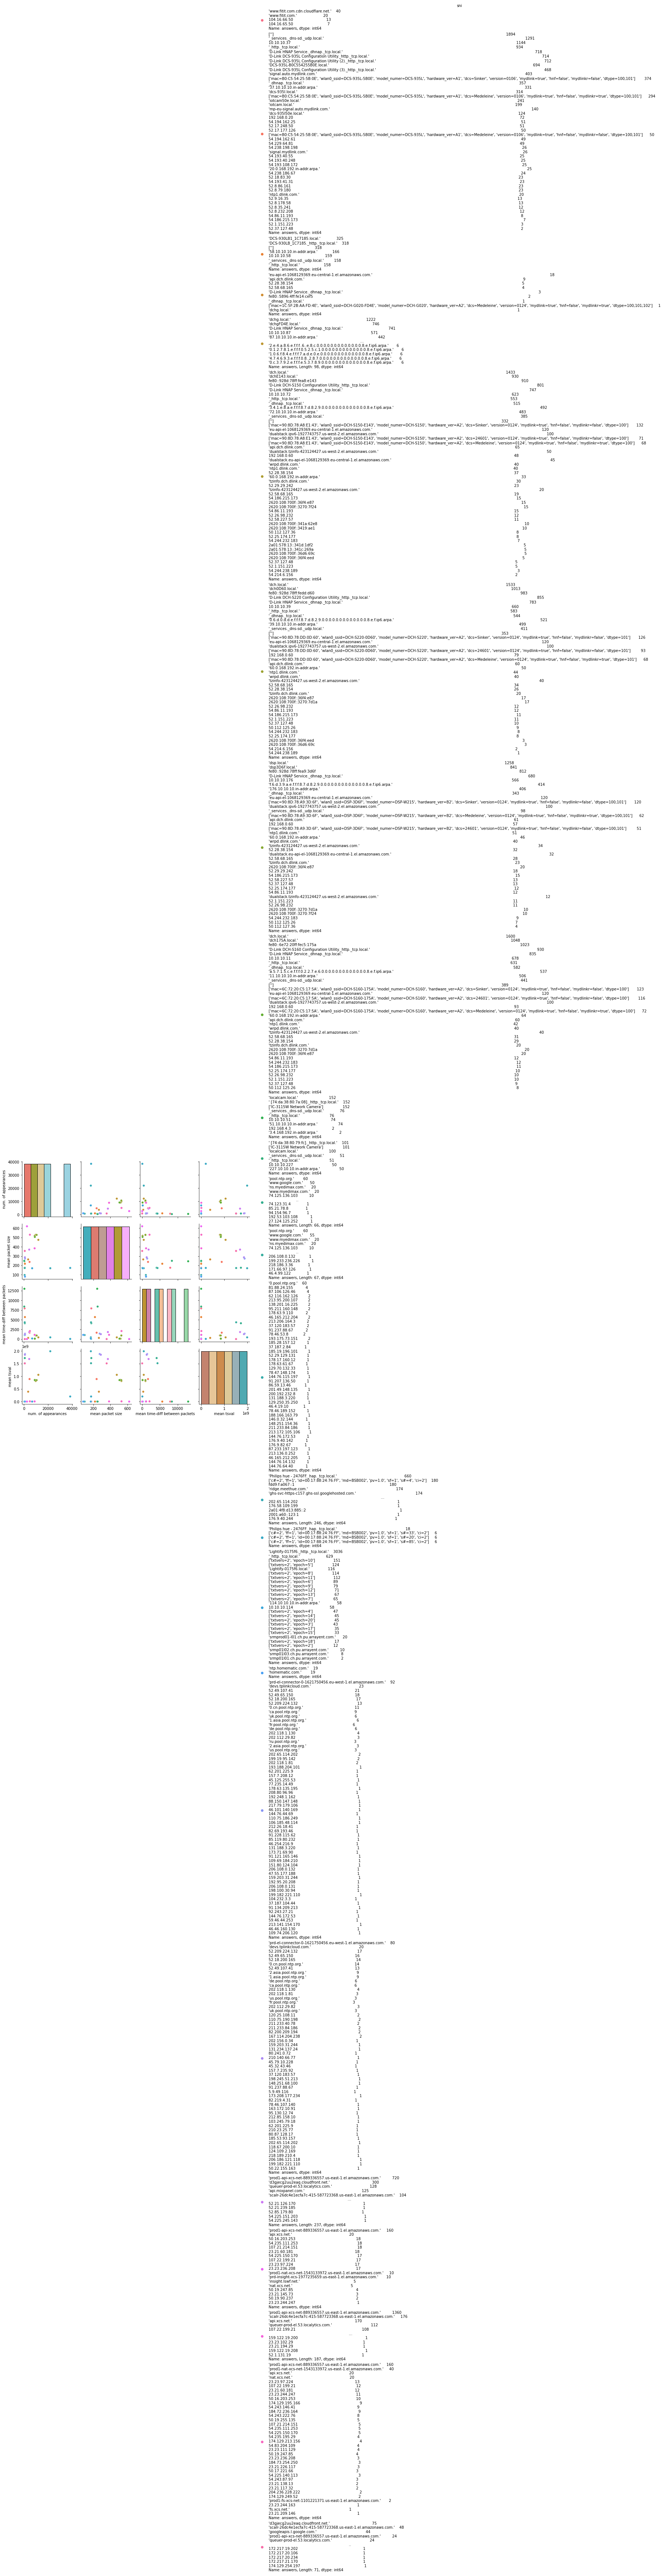

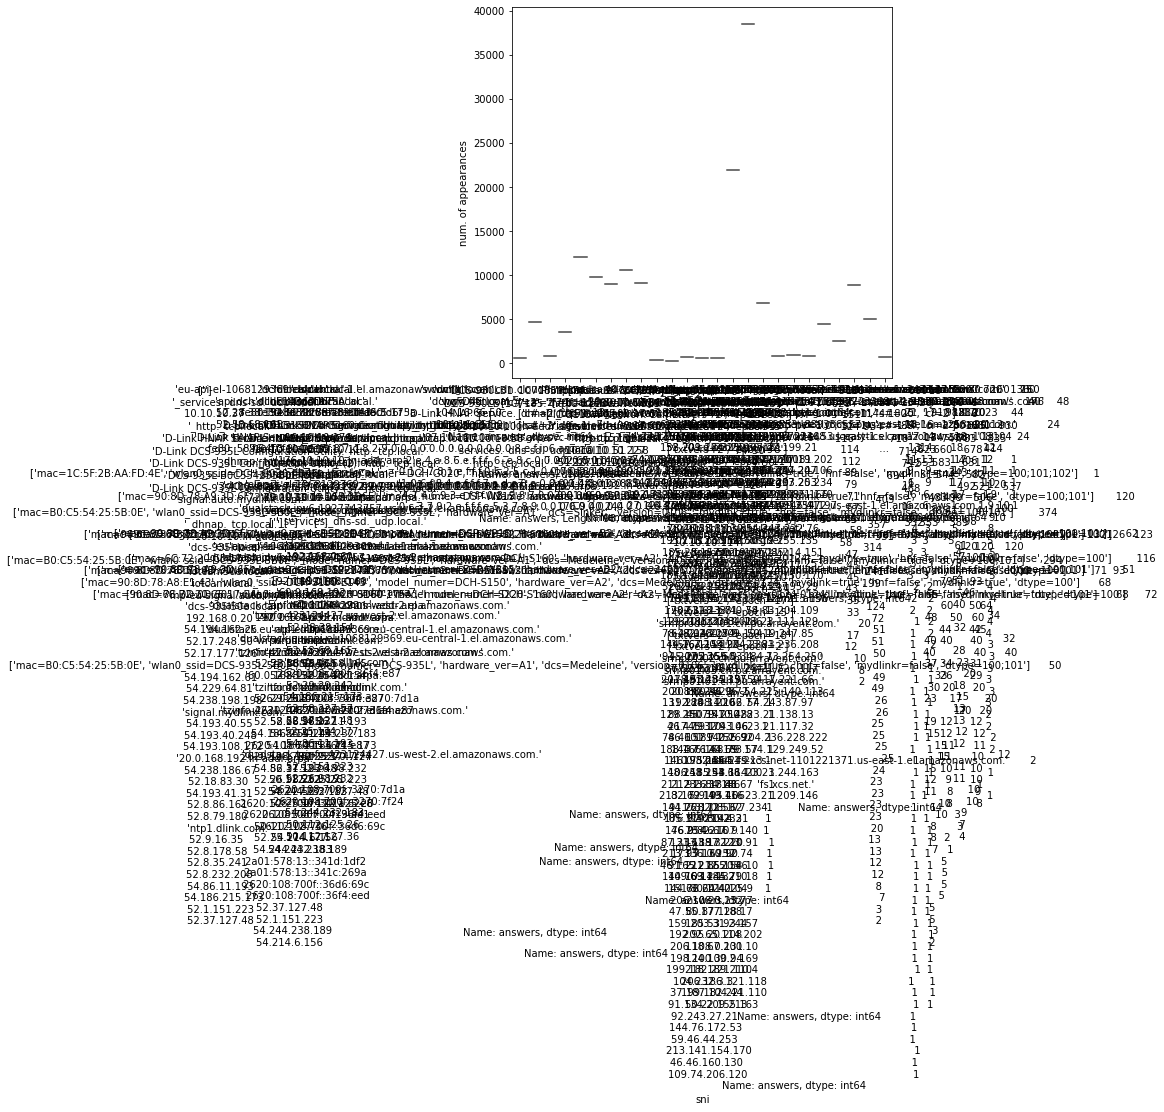

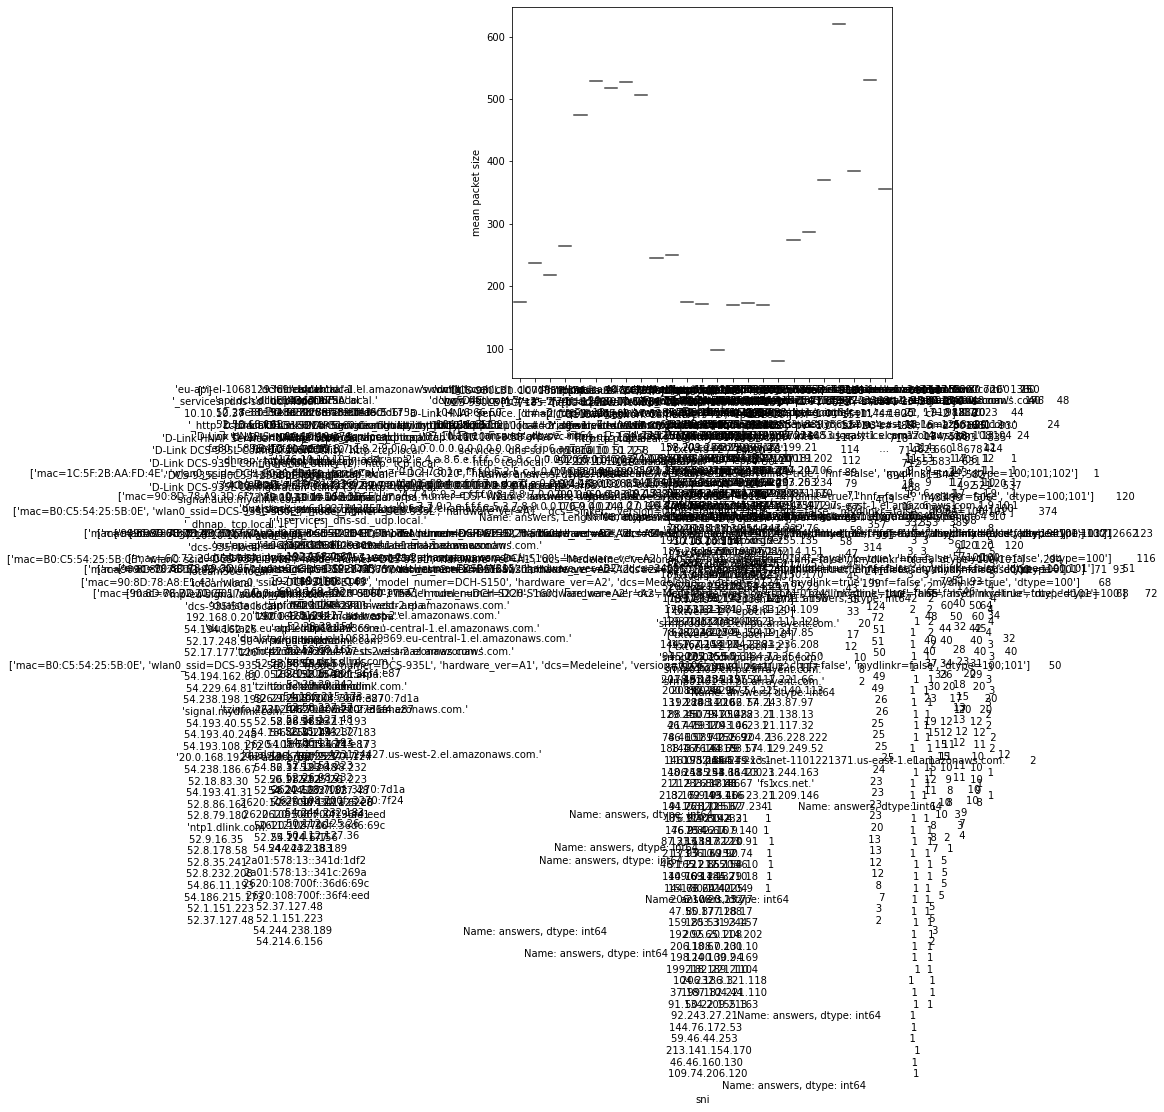

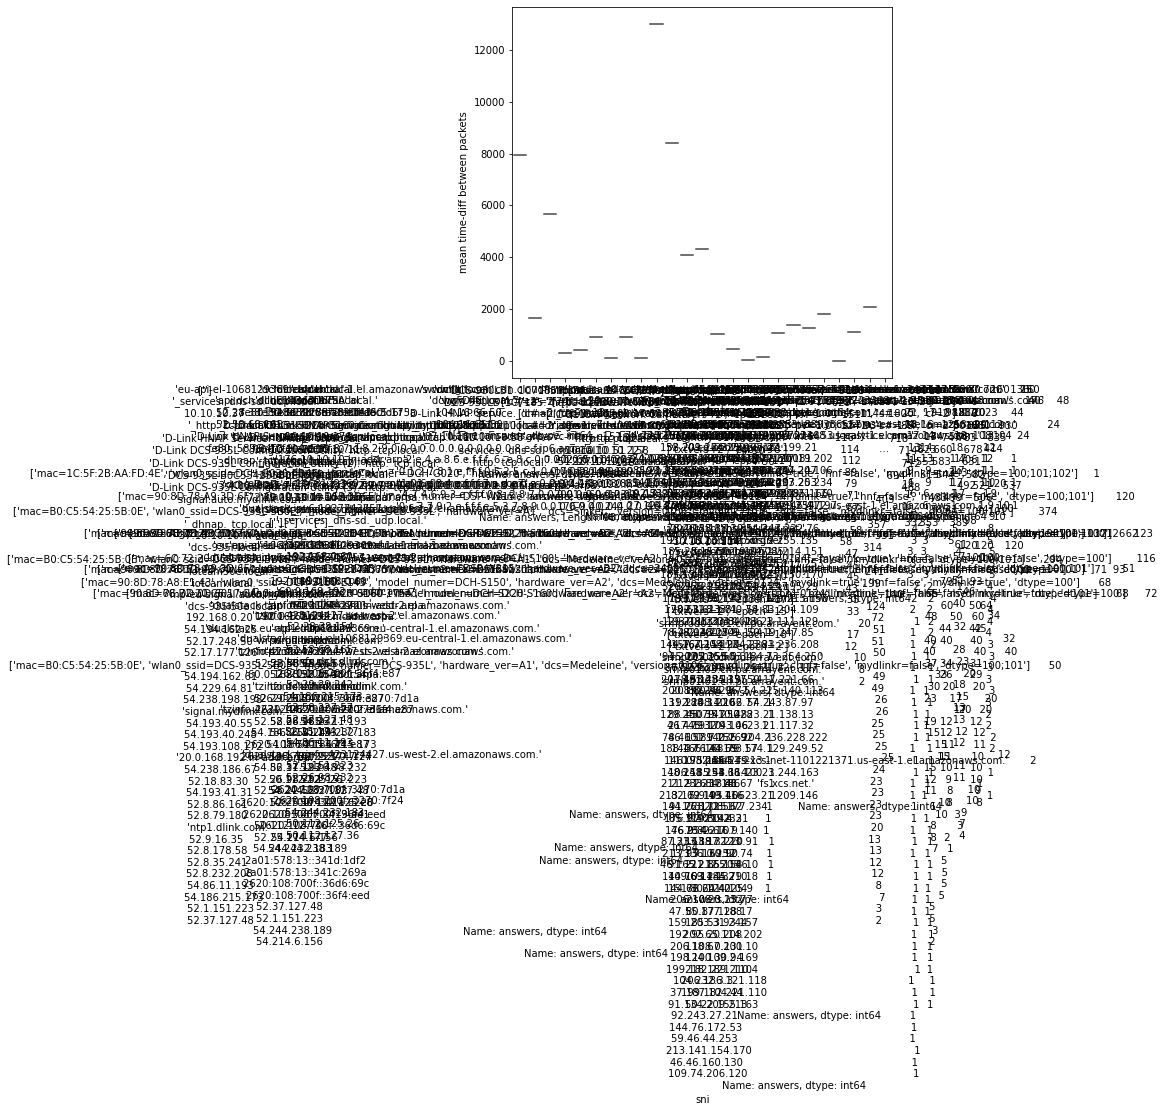

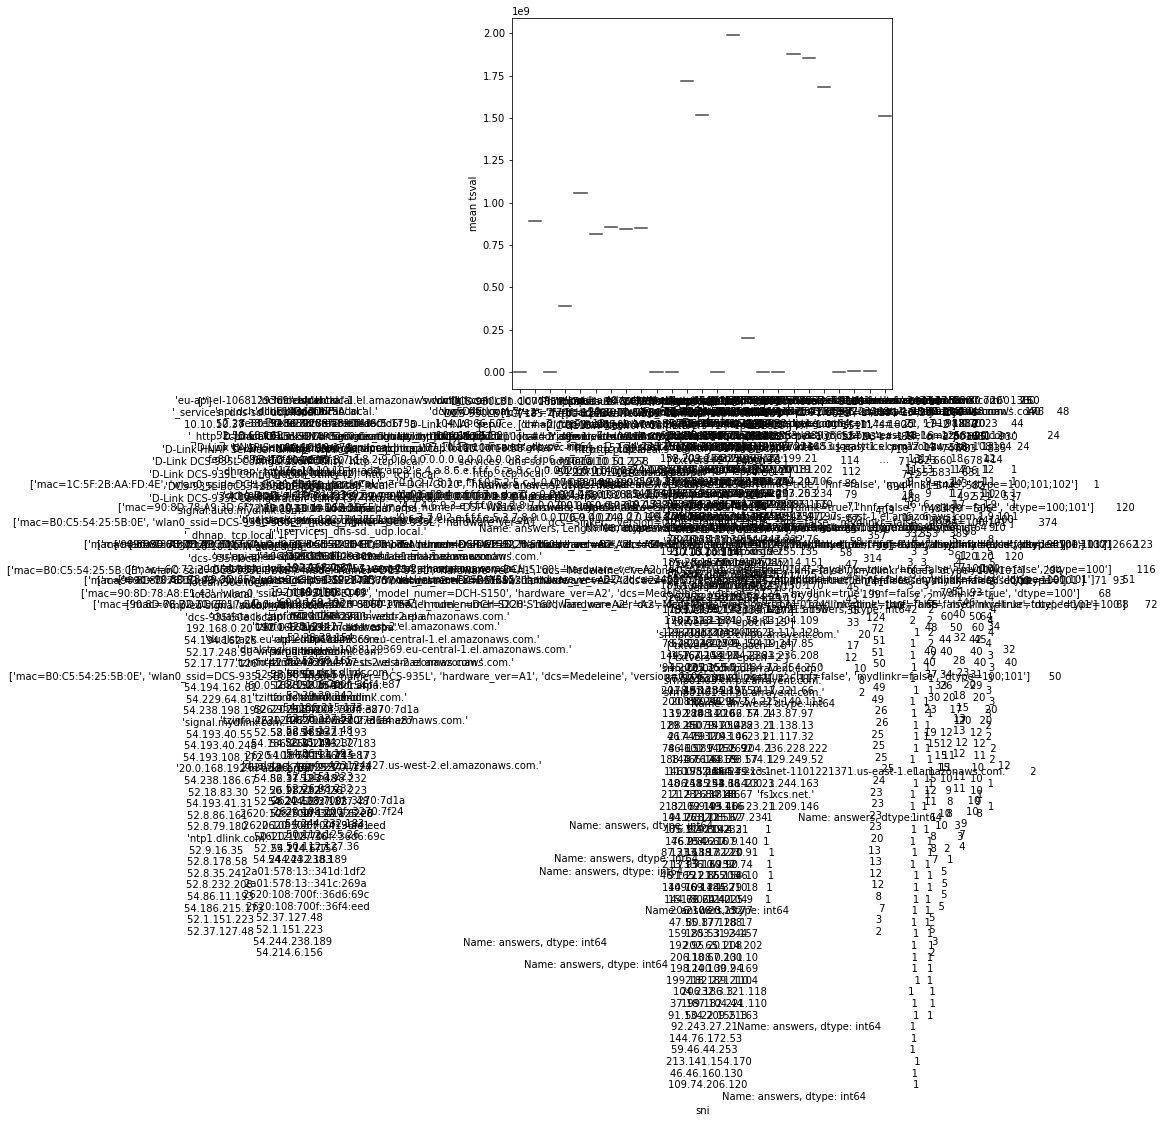

In [41]:
for i, name in enumerate(iot_table.select_dtypes(include=object).columns):
    print('***' + name)
    sb.pairplot(iot_table.dropna(), hue=name, diag_kind='hist')
    plt.show()

    for column_index, column in enumerate(iot_table.select_dtypes(include=numerics).columns):
        if column == name:
            continue
        plt.figure(figsize=(15, 15))
        plt.subplot(2, 2, column_index + 1)
        sb.violinplot(x=name, y=column, data=iot_table)
        plt.show()